In [525]:
from sklearn.datasets import  fetch_california_housing
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()

import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 500)

pd.set_option('display.max_colwidth', 1)
#to show all values in row

In [526]:
df = pd.read_csv("BankChurners.csv")
df.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


In [558]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   clientnum                 10127 non-null  int64  
 1   attrition_flag            10127 non-null  int64  
 2   customer_age              10127 non-null  int64  
 3   gender                    10127 non-null  object 
 4   dependent_count           10127 non-null  int64  
 5   education_level           10127 non-null  object 
 6   marital_status            10127 non-null  object 
 7   income_category           10127 non-null  object 
 8   card_category             10127 non-null  object 
 9   months_on_book            10127 non-null  int64  
 10  total_relationship_count  10127 non-null  int64  
 11  months_inactive_12_mon    10127 non-null  int64  
 12  contacts_count_12_mon     10127 non-null  int64  
 13  credit_limit              10127 non-null  float64
 14  total_

### Cleaning Data

In [536]:
#Cleaning the names of columns 

df.columns = df.columns.str.lower().str.replace(' ', '_')

In [538]:
#Deleting last two colums

columns_to_drop = df.columns[-2:]
df.drop(columns=columns_to_drop, inplace=True)

In [554]:
#Checking NULL values

df.isna().sum()

clientnum                   0
attrition_flag              0
customer_age                0
gender                      0
dependent_count             0
education_level             0
marital_status              0
income_category             0
card_category               0
months_on_book              0
total_relationship_count    0
months_inactive_12_mon      0
contacts_count_12_mon       0
credit_limit                0
total_revolving_bal         0
avg_open_to_buy             0
total_amt_chng_q4_q1        0
total_trans_amt             0
total_trans_ct              0
dtype: int64

In [556]:
#Checking duplicated values

df.duplicated().sum()

0

In [540]:
#Transfoming TARGET "attrition_flag" to numerical

print(df["attrition_flag"].value_counts())
enc.fit(df['attrition_flag'])
df['attrition_flag'] = enc.transform(df['attrition_flag'])
print(df['attrition_flag'].value_counts())

attrition_flag
Existing Customer    8500
Attrited Customer    1627
Name: count, dtype: int64
attrition_flag
1    8500
0    1627
Name: count, dtype: int64


In [542]:
#Creating new df only numerical values to see correlation

df_num = df.select_dtypes(include='number')

In [544]:
df_num = df_num.drop(columns = ["clientnum"])

In [546]:
df_num.head(5)

,attrition_flag,customer_age,dependent_count,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct
0,1,45,3,39,5,1,3,12691.0,777,11914.0,1.335,1144,42
1,1,49,5,44,6,1,2,8256.0,864,7392.0,1.541,1291,33
2,1,51,3,36,4,1,0,3418.0,0,3418.0,2.594,1887,20
3,1,40,4,34,3,4,1,3313.0,2517,796.0,1.405,1171,20
4,1,40,3,21,5,1,0,4716.0,0,4716.0,2.175,816,28


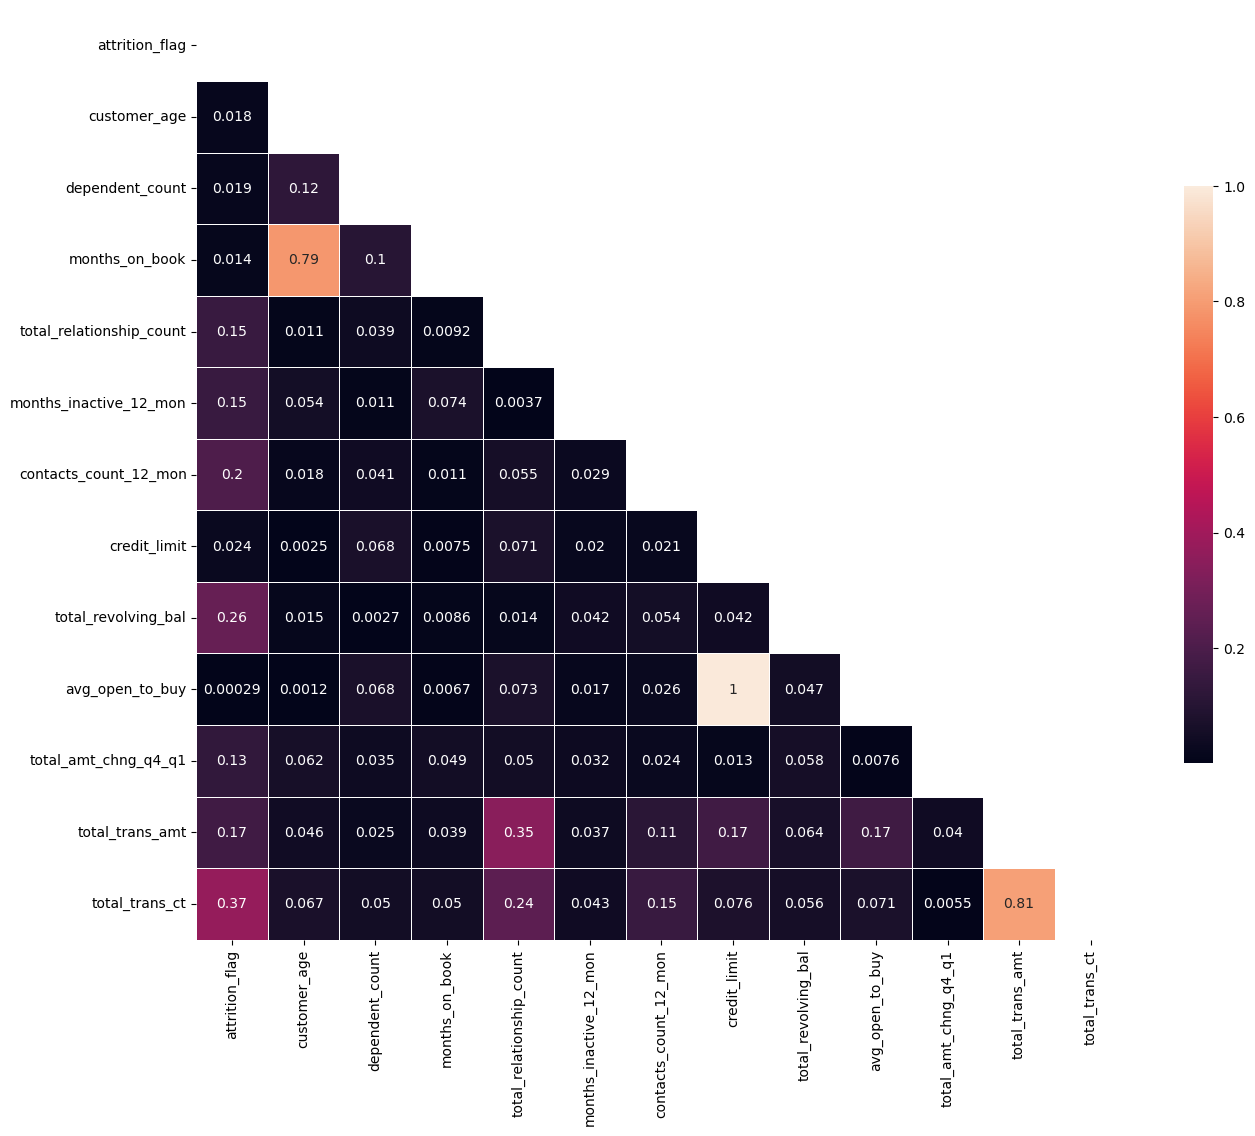

In [548]:
corr=np.abs(df_num.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [ ]:
df_num = df_num.drop(columns = ["avg_open_to_buy", "credit_limit", "months_on_book", "dependent_count", "customer_age", "total_trans_amt", "total_trans_ct"])


In [414]:
#Transfoming "gender" to numerical

print(df["gender"].value_counts())
enc.fit(df['gender'])
df['gender'] = enc.transform(df['gender'])
print(df['gender'].value_counts())

gender
F    5358
M    4769
Name: count, dtype: int64
gender
0    5358
1    4769
Name: count, dtype: int64


In [415]:
#Transfoming "education_level" to numerical

print(df["education_level"].value_counts())
enc.fit(df['education_level'])
df['education_level'] = enc.transform(df['education_level'])
print(df['education_level'].value_counts())

education_level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate    516 
Doctorate        451 
Name: count, dtype: int64
education_level
2    3128
3    2013
6    1519
5    1487
0    1013
4    516 
1    451 
Name: count, dtype: int64


In [416]:
#Transfoming "marital_status" to numerical

print(df["marital_status"].value_counts())
enc.fit(df['marital_status'])
df['marital_status'] = enc.transform(df['marital_status'])
print(df['marital_status'].value_counts())

marital_status
Married     4687
Single      3943
Unknown     749 
Divorced    748 
Name: count, dtype: int64
marital_status
1    4687
2    3943
3    749 
0    748 
Name: count, dtype: int64


In [417]:
#Transfoming "income_category" to numerical

print(df["income_category"].value_counts())
enc.fit(df['income_category'])
df['income_category'] = enc.transform(df['income_category'])
print(df['income_category'].value_counts())

income_category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
Unknown           1112
$120K +           727 
Name: count, dtype: int64
income_category
4    3561
1    1790
3    1535
2    1402
5    1112
0    727 
Name: count, dtype: int64


In [418]:
#Transfoming "card_category" to numerical

print(df["card_category"].value_counts())
enc.fit(df['card_category'])
df['card_category'] = enc.transform(df['card_category'])
print(df['card_category'].value_counts())

card_category
Blue        9436
Silver      555 
Gold        116 
Platinum    20  
Name: count, dtype: int64
card_category
0    9436
3    555 
1    116 
2    20  
Name: count, dtype: int64


### Perform Train Test Split

In [421]:
features = df.drop(columns = ["clientnum", "attrition_flag"])
target = df["attrition_flag"]

In [422]:
features.head(5)

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,45,1,3,3,1,2,0,39,5,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,49,0,5,2,2,4,0,44,6,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,51,1,3,2,1,3,0,36,4,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,40,0,4,3,3,4,0,34,3,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,40,1,3,5,1,2,0,21,5,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000


In [423]:
target.head(5)

0    1
1    1
2    1
3    1
4    1
Name: attrition_flag, dtype: int64

In [424]:
target.value_counts()

attrition_flag
1    8500
0    1627
Name: count, dtype: int64

In [425]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.20, random_state=0)

### Model Selection

In [447]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
knn.score(X_test, y_test)

0.8928923988153998

In [449]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)

0.38030831980970814

## Feature Selection

In [451]:
normalizer = MinMaxScaler()
normalizer.fit(X_train)

MinMaxScaler()

In [453]:
X_train_norm = normalizer.transform(X_train)

X_test_norm = normalizer.transform(X_test)

In [455]:
X_train_norm = pd.DataFrame(X_train_norm, columns = X_train.columns)
X_train_norm.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0.617021,1.0,0.4,0.333333,0.333333,0.0,0.0,0.860465,0.4,0.333333,0.000000,0.286528,0.610250,0.271547,0.387695,0.060198,0.187500,0.269251,0.141709
1,0.127660,1.0,0.0,0.333333,0.666667,1.0,0.0,0.325581,1.0,0.500000,0.500000,0.235799,0.000000,0.267432,0.238151,0.111939,0.453125,0.128702,0.000000
2,0.191489,0.0,0.8,0.833333,0.333333,1.0,0.0,0.279070,0.2,0.500000,0.333333,0.058671,0.233214,0.080624,0.197233,0.256537,0.546875,0.189015,0.174874
3,0.297872,0.0,0.4,1.000000,0.333333,0.8,0.0,0.534884,0.4,0.166667,0.166667,0.110488,0.943981,0.078450,0.241978,0.101869,0.367188,0.145665,0.469347
4,0.404255,0.0,0.8,0.500000,0.333333,0.2,0.0,0.534884,0.8,0.333333,0.166667,0.045641,0.886770,0.020460,0.252576,0.173862,0.539062,0.156166,0.760804


In [457]:
X_test_norm = pd.DataFrame(X_test_norm, columns = X_test.columns)
X_test_norm.head()

,customer_age,gender,dependent_count,education_level,marital_status,income_category,card_category,months_on_book,total_relationship_count,months_inactive_12_mon,contacts_count_12_mon,credit_limit,total_revolving_bal,avg_open_to_buy,total_amt_chng_q4_q1,total_trans_amt,total_trans_ct,total_ct_chng_q4_q1,avg_utilization_ratio
0,0.382979,1.0,1.0,0.833333,0.000000,0.4,0.0,0.604651,0.8,0.333333,0.000000,0.441255,0.634485,0.418101,0.228142,0.173473,0.382812,0.243134,0.100503
1,0.382979,0.0,0.6,1.000000,0.666667,1.0,0.0,0.488372,0.2,0.500000,0.500000,0.743180,0.000000,0.753811,0.306152,0.466674,0.390625,0.144857,0.000000
2,0.234043,0.0,0.6,0.500000,0.666667,0.8,0.0,0.302326,0.4,0.166667,0.333333,0.044704,0.880413,0.020026,0.238446,0.223323,0.445312,0.131664,0.763819
3,0.170213,1.0,0.2,0.333333,0.333333,0.2,0.0,0.534884,1.0,0.333333,0.500000,0.069433,0.510528,0.070712,0.304386,0.076054,0.179688,0.323102,0.345729
4,0.531915,0.0,0.8,0.500000,0.666667,0.8,0.0,0.465116,0.2,0.666667,0.500000,0.049269,0.822805,0.028604,0.251398,0.278958,0.476562,0.261712,0.678392


In [459]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)

0.38030831980970814

In [461]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_norm, y_train)
knn.score(X_test_norm, y_test)

0.8830207305034551

### Feature Selection

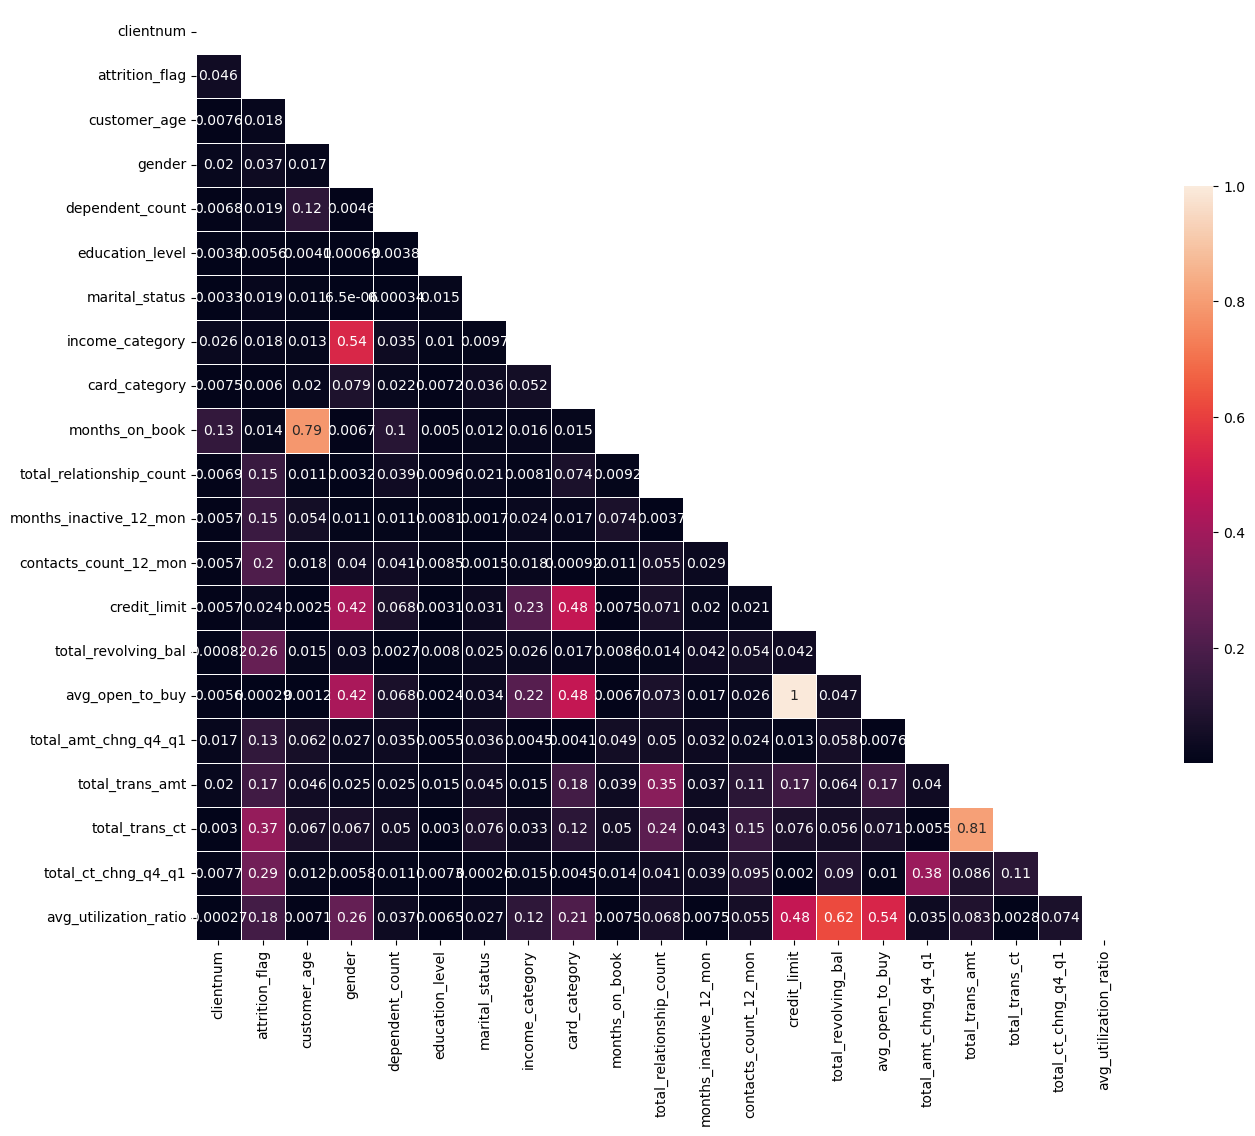

In [463]:
corr=np.abs(df.corr())

#Set up mask for triangle representation
mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(15, 15))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask,  vmax=1,square=True, linewidths=.5, cbar_kws={"shrink": .5},annot = corr)

plt.show()

In [473]:
X_train_reduced = X_train_norm.drop(columns = ["avg_open_to_buy", "credit_limit", "months_on_book", "card_category", "income_category", "marital_status", "education_level", "dependent_count", "gender", "customer_age", "total_trans_amt", "total_trans_ct"])
X_test_reduced = X_test_norm.drop(columns = ["avg_open_to_buy", "credit_limit", "months_on_book", "card_category", "income_category", "marital_status", "education_level", "dependent_count", "gender", "customer_age", "total_trans_amt", "total_trans_ct"])

In [475]:
knn = KNeighborsRegressor(n_neighbors=10)
knn.fit(X_train_reduced, y_train)
knn.score(X_test_reduced, y_test)

0.30481346821147004

In [477]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_reduced, y_train)
knn.score(X_test_reduced, y_test)

0.8854886475814413